<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [5]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [6]:
df = pd.read_csv('Wholesale customers data.csv')



In [7]:
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.


Data types of each column:
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Basic statistical details:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper

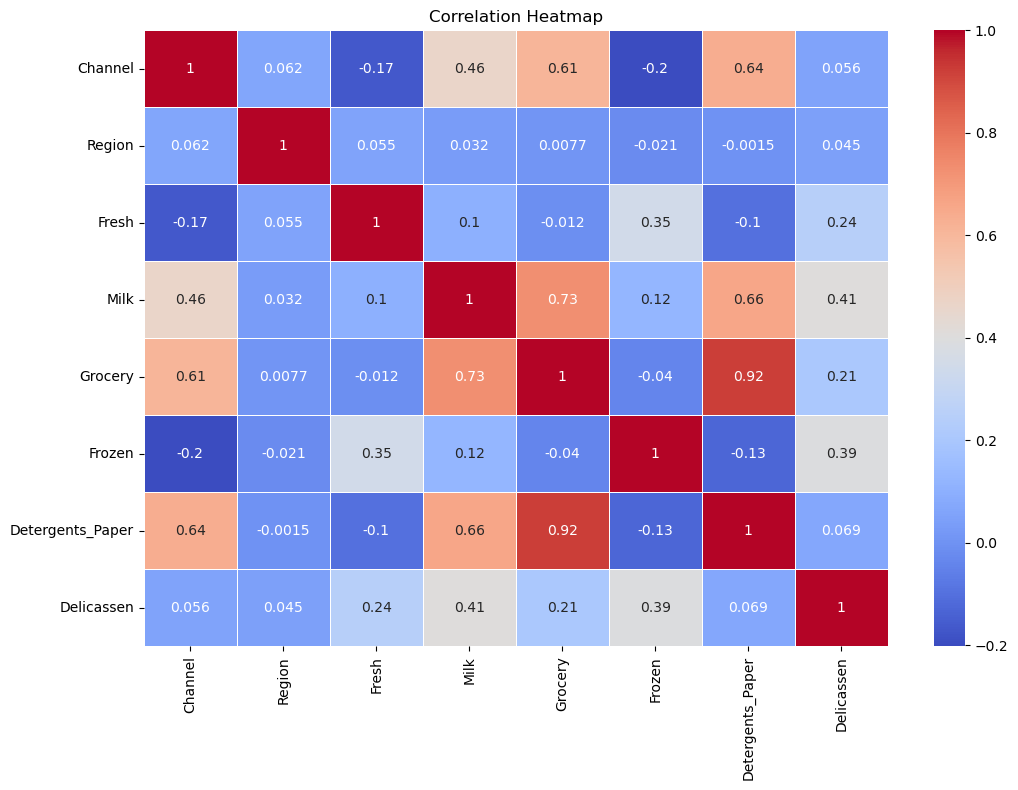


Column-wise data distribution (skewness):
Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


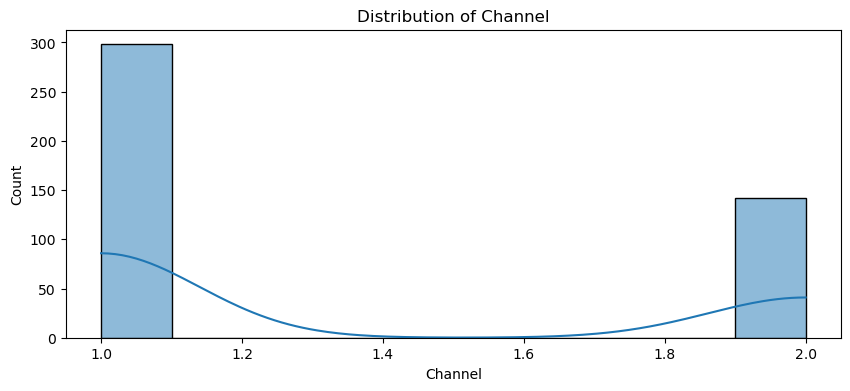

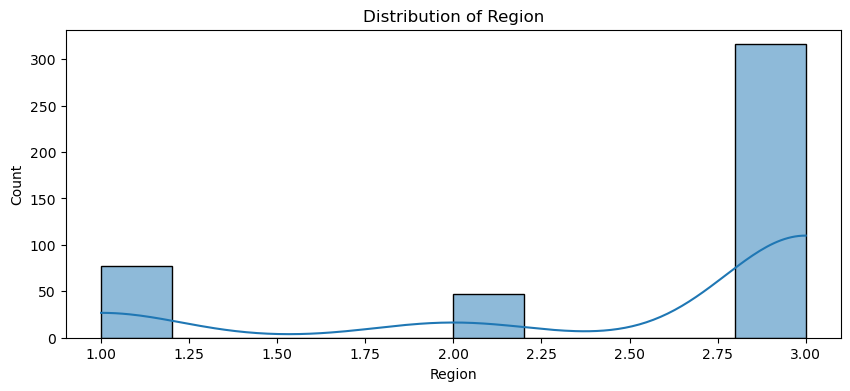

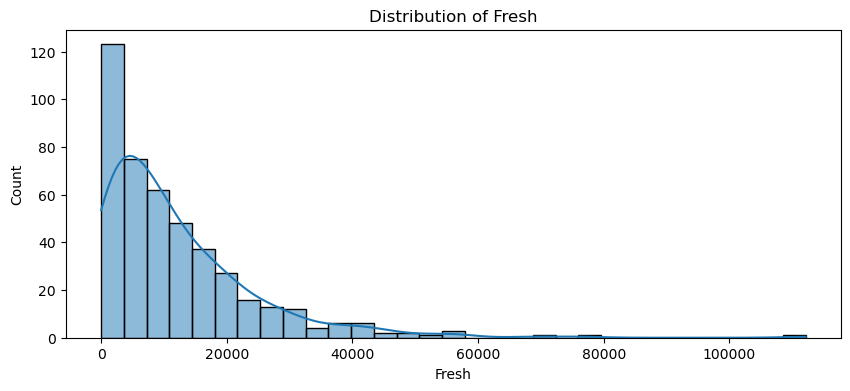

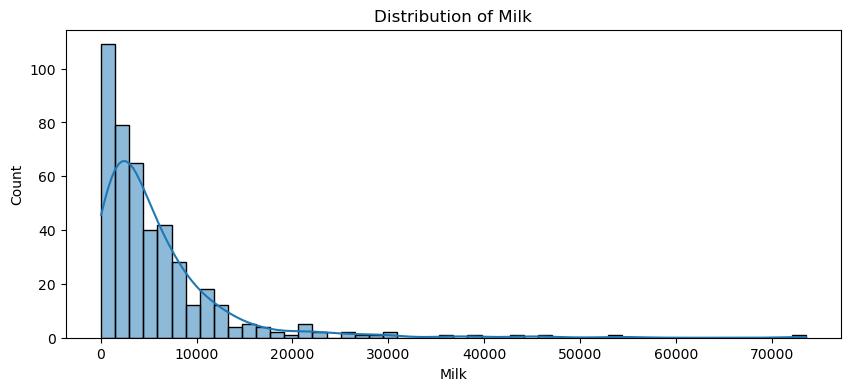

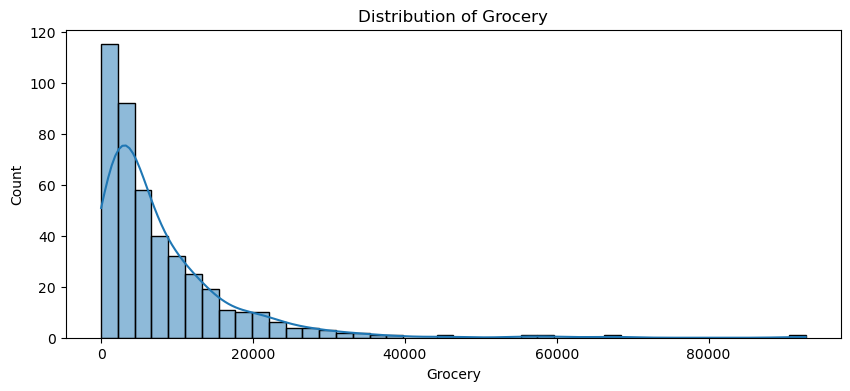

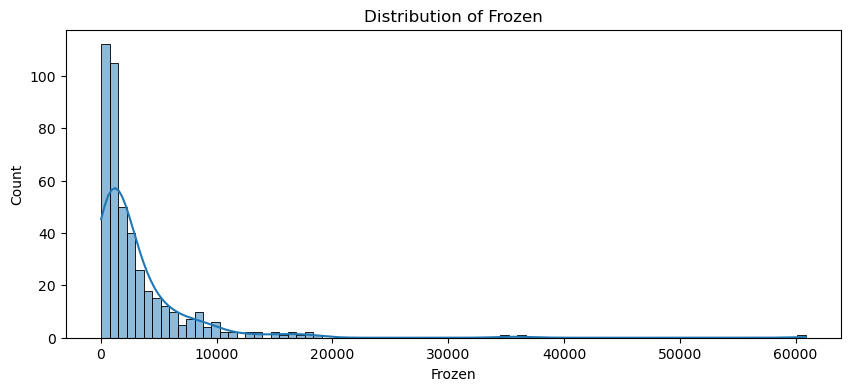

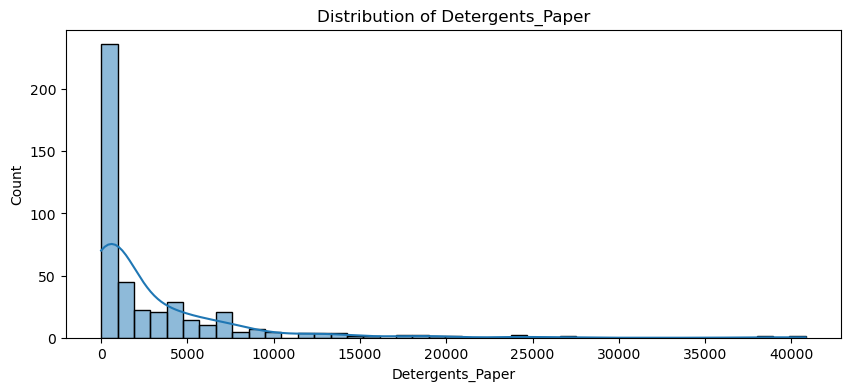

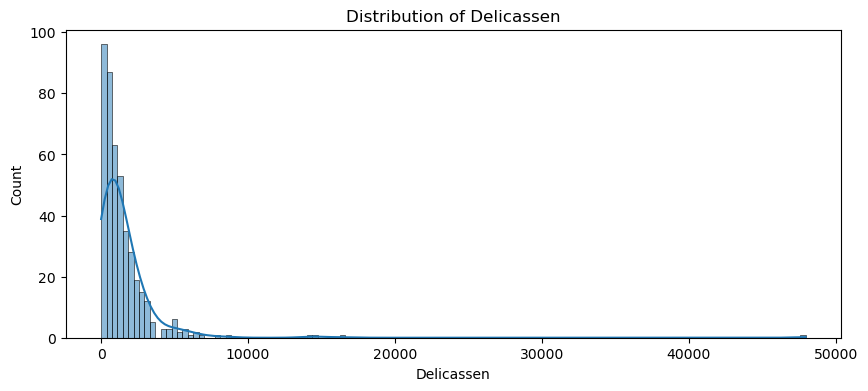


Checking Pareto principle (80/20 rule):


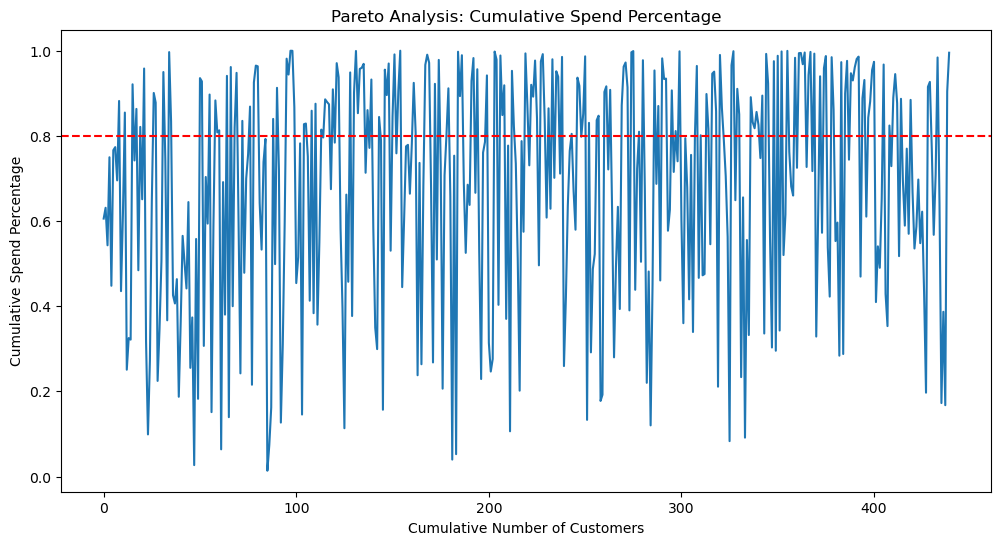


251 customers account for 80% of total spend, which is 57.05% of the total customers.


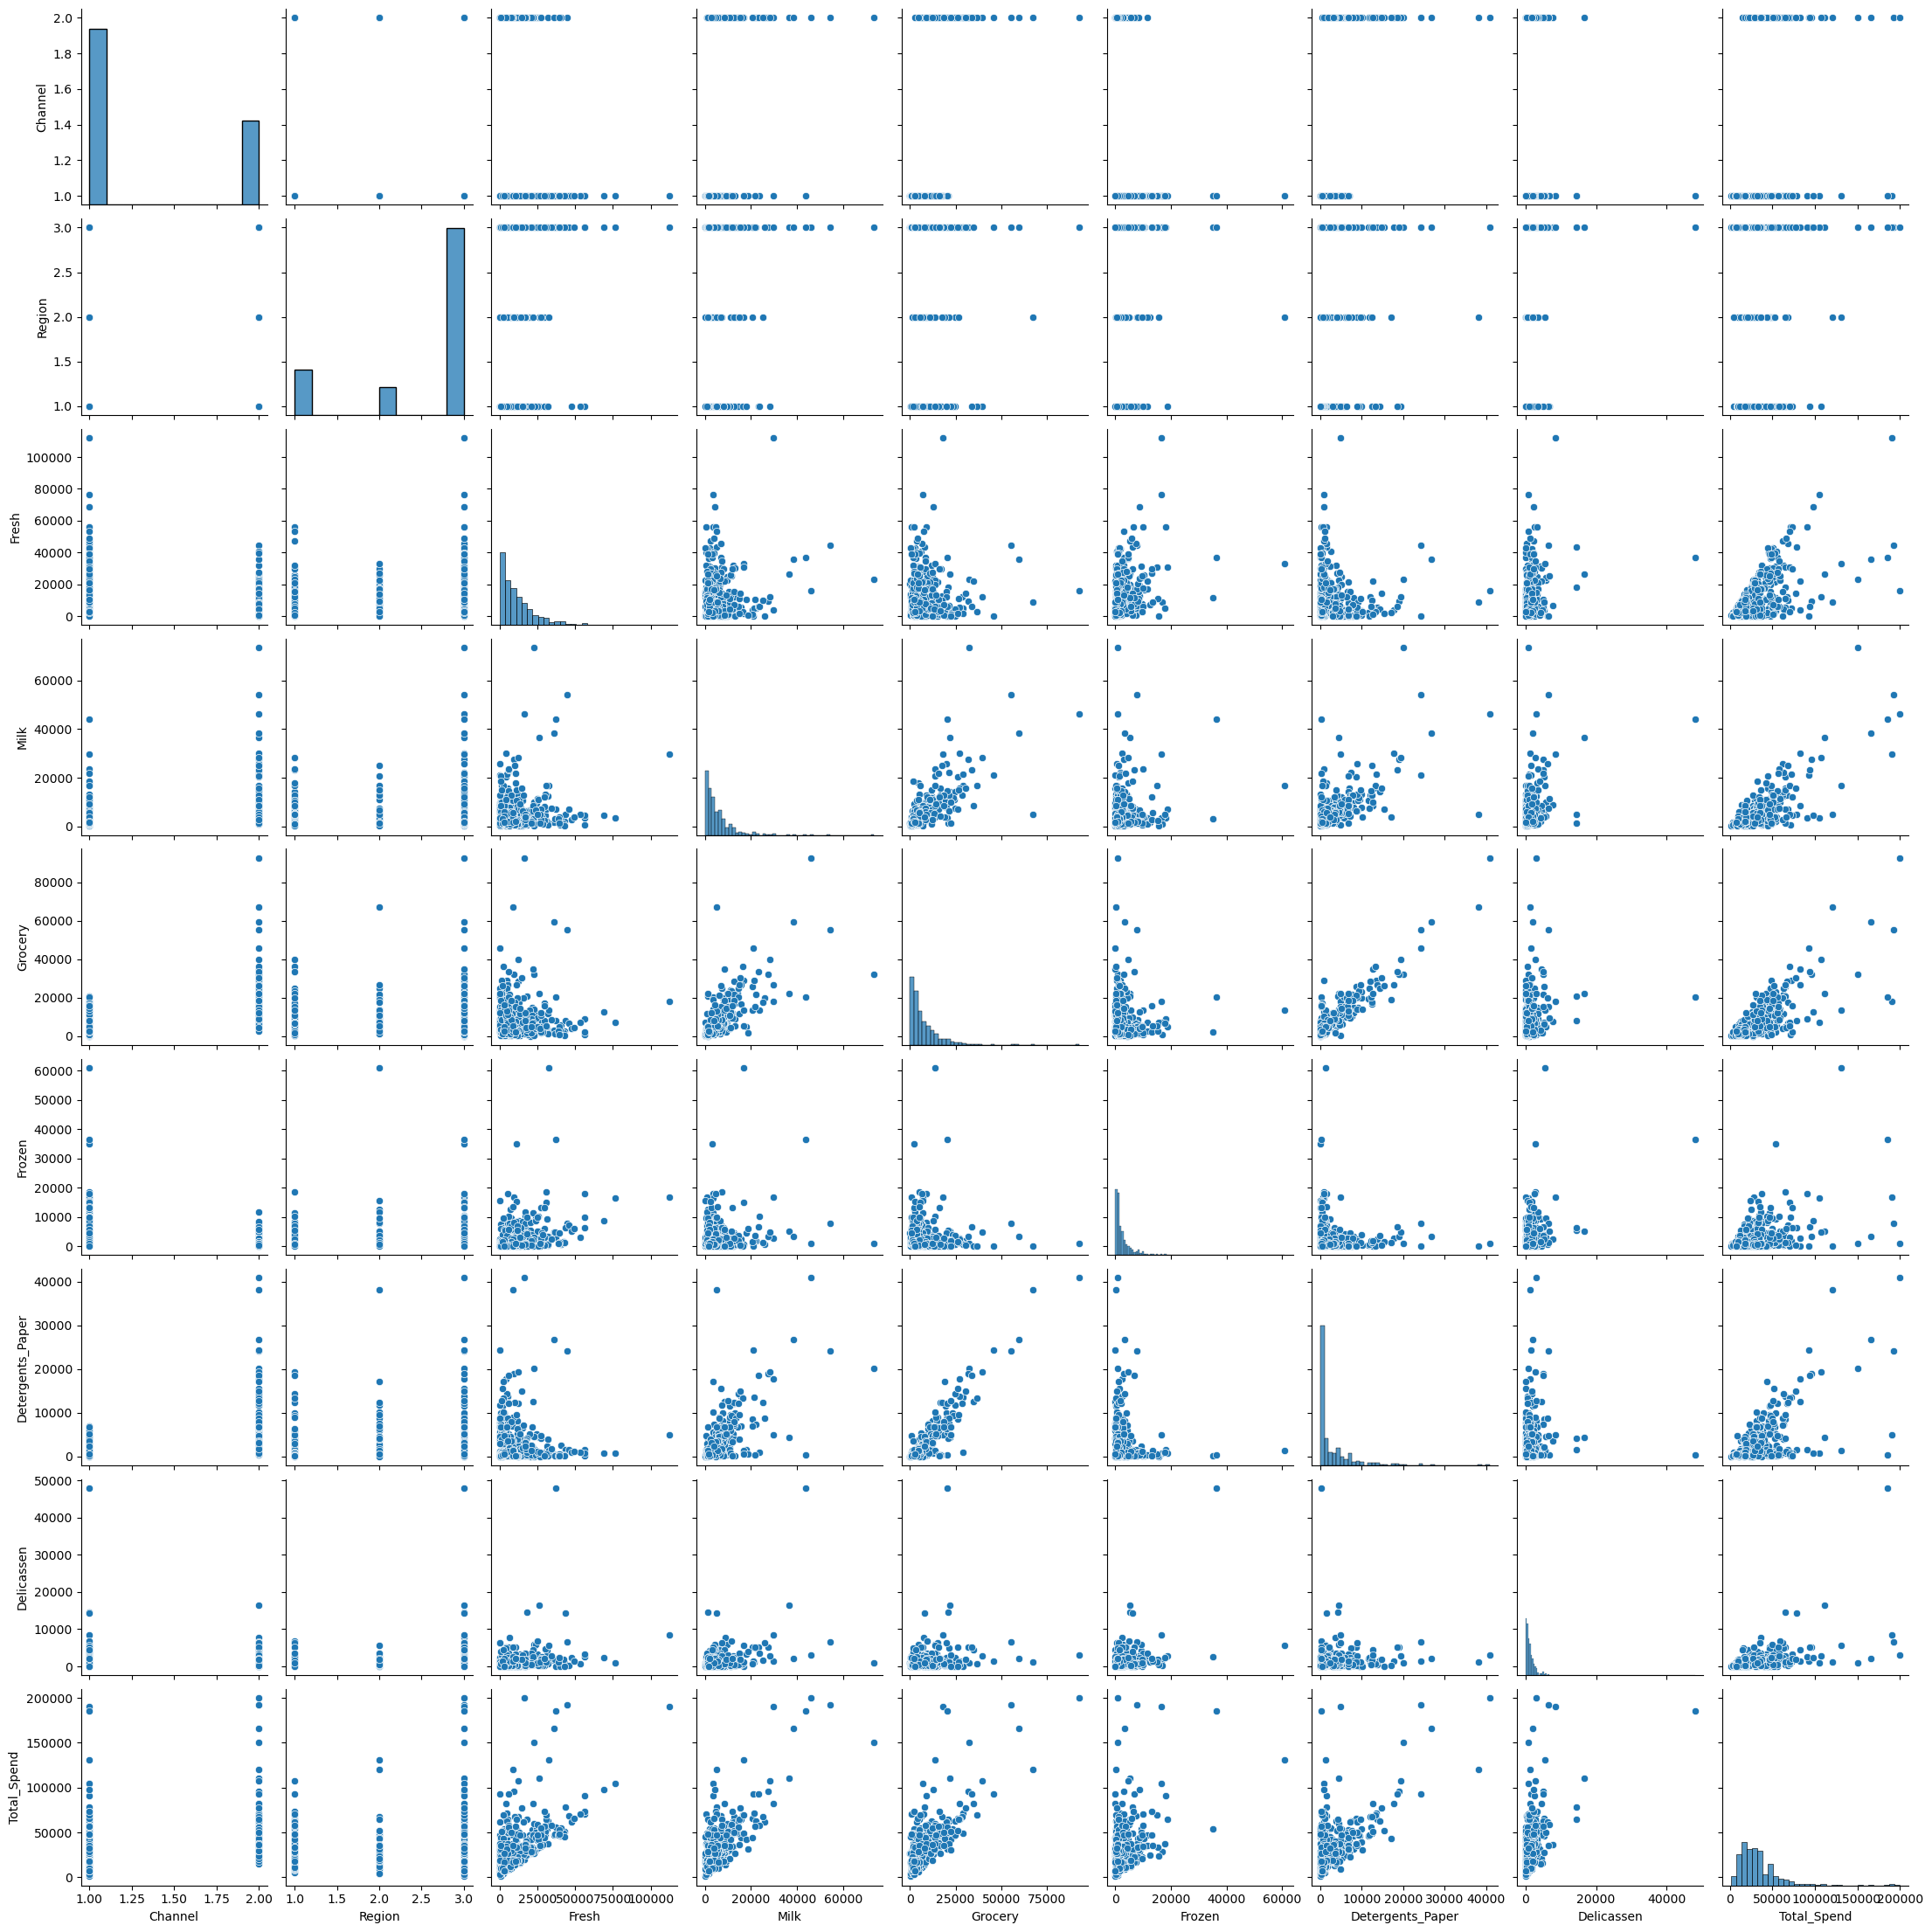

In [8]:
# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Display basic statistical details
print("\nBasic statistical details:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for column collinearity (high correlations)
print("\nCorrelation matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Column-wise data distribution
print("\nColumn-wise data distribution (skewness):")
print(df.skew())

# Plotting histograms for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['string', 'boolean']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Pareto principle (80/20 rule)
print("\nChecking Pareto principle (80/20 rule):")
df['Total_Spend'] = df[numerical_columns].sum(axis=1)
sorted_df = df.sort_values(by='Total_Spend', ascending=False)
sorted_df['Cumulative Spend'] = sorted_df['Total_Spend'].cumsum()
total_spend = sorted_df['Total_Spend'].sum()
sorted_df['Cumulative Spend Percentage'] = sorted_df['Cumulative Spend'] / total_spend

plt.figure(figsize=(12, 6))
sns.lineplot(data=sorted_df, x=sorted_df.index, y='Cumulative Spend Percentage')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.title('Pareto Analysis: Cumulative Spend Percentage')
plt.xlabel('Cumulative Number of Customers')
plt.ylabel('Cumulative Spend Percentage')
plt.show()

pareto_cutoff = sorted_df[sorted_df['Cumulative Spend Percentage'] <= 0.8].shape[0]
total_customers = sorted_df.shape[0]
pareto_percentage = (pareto_cutoff / total_customers) * 100

print(f"\n{pareto_cutoff} customers account for 80% of total spend, which is {pareto_percentage:.2f}% of the total customers.")

# Pairplot to see pairwise relationships
sns.pairplot(df)
plt.show()

# Bar plot for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of each category in {col}')
    plt.show()

# Box plots to show distributions with respect to categories
for col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df[cat_col], y=df[col])
        plt.title(f'{col} distribution by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()


**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [9]:
from scipy.stats import zscore, ttest_1samp

# Convert categorical data if necessary (example converting 'Category' column to numerical codes)
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nConverting categorical data to numerical codes if necessary:")
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes
    print(f"Converted {col} to numerical codes")

# Check for outliers using z-scores
print("\nChecking for outliers using z-scores:")
z_scores = df.apply(zscore)
print(z_scores.abs().max())

# Removing outliers with z-score > 3
df_no_outliers = df[(z_scores.abs() < 3).all(axis=1)]
print(f"\nData shape after removing outliers: {df_no_outliers.shape}")


Converting categorical data to numerical codes if necessary:

Checking for outliers using z-scores:
Channel              1.448652
Region               1.995342
Fresh                7.927738
Milk                 9.183650
Grocery              8.936528
Frozen              11.919002
Detergents_Paper     7.967672
Delicassen          16.478447
Total_Spend          6.330724
dtype: float64

Data shape after removing outliers: (414, 9)


**Your comment here**

-  Categorical need to be transformed into number for processing
-  Values outside of 3 levels of stand. deviations to be taken out.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [10]:
# Your import here:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

customers_scale = scaler.fit_transform(df)

In [11]:
scaled_df = pd.DataFrame(customers_scale)
scaled_df.head()

,0,1,2,3,4,5,6,7,8
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.033692
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.001557
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.128577
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.222019
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.489050


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

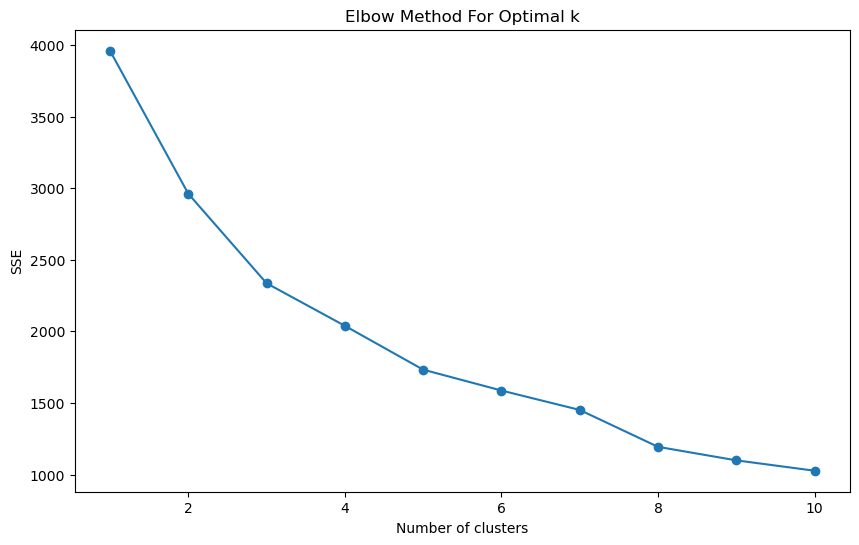

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Total_Spend  labels  
0        1338        34117       0  
1        1776        33271       0  
2        7844        36615       0  
3        1788        27385       1  
4        5185        46105       0  


In [12]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Fitting K-Means with the optimal number of clusters found (suppose it's 3 here)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)

# Assigning the labels to the original data frame
df['labels'] = kmeans.labels_

# Display the first few rows of the dataframe with labels
print(df.head())

In [14]:
pip install kneed


Note: you may need to restart the kernel to use updated packages.


Optimal number of clusters: 3


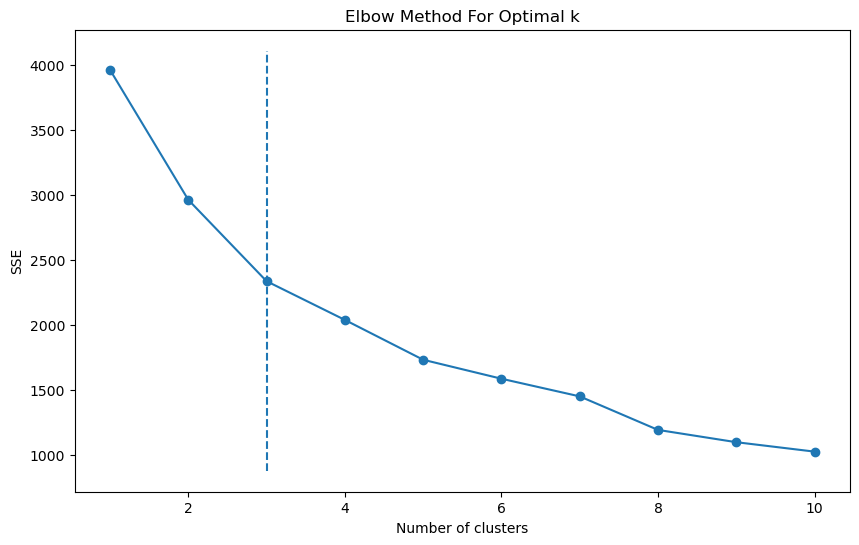

In [15]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'sse' from your previous K-Means loop
k_values = range(1, 11)

# Finding the elbow point using KneeLocator
kneedle = KneeLocator(k_values, sse, curve='convex', direction='decreasing')

# Optimal number of clusters
optimal_k = kneedle.elbow

print("Optimal number of clusters:", optimal_k)

# Plotting the elbow curve with the optimal number highlighted
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()


### Looking to the elbow we can choose 2 like the correct number of clusters

In [16]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [17]:
df['Label'] = clusters
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend,labels,Label
0,2,3,12669,9656,7561,214,2674,1338,34117,0,1
1,2,3,7057,9810,9568,1762,3293,1776,33271,0,1
2,2,3,6353,8808,7684,2405,3516,7844,36615,0,1
3,1,3,13265,1196,4221,6404,507,1788,27385,1,0
4,2,3,22615,5410,7198,3915,1777,5185,46105,0,1


Count the values in `labels`.

In [18]:
label_counts = df['Label'].value_counts()

print(label_counts)

Label
0    300
1    140
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [25]:
from sklearn.cluster import DBSCAN

# Create an instance of DBSCAN
dbscan = DBSCAN(eps=0.5)

# Fit the DBSCAN model to the scaled data
dbscan.fit(customers_scale)

# Retrieve the cluster labels from the model
dbscan_labels = dbscan.labels_

# Add the DBSCAN cluster labels to your original dataframe
df['labels_DBSCAN'] = dbscan_labels

# Check the new labels column and the existing one
print(df[['Label', 'labels_DBSCAN']].head())


   Label  labels_DBSCAN
0      1             -1
1      1             -1
2      1             -1
3      0             -1
4      1             -1


Count the values in `labels_DBSCAN`.

In [26]:
label_counts2 = df['labels_DBSCAN'].value_counts()

print(label_counts2)


labels_DBSCAN
-1    286
 1    120
 3     16
 2      7
 4      6
 0      5
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [28]:
def plot(x, y, hue, title):
    sns.scatterplot(x=x, y=y, hue=hue)
    plt.title(title)
    plt.legend(title=hue.name)  # Dynamically name the legend based on the hue
    return plt.show()


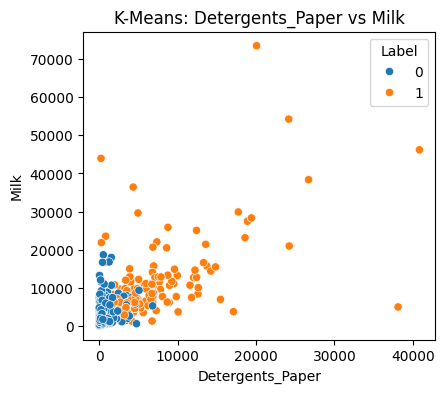

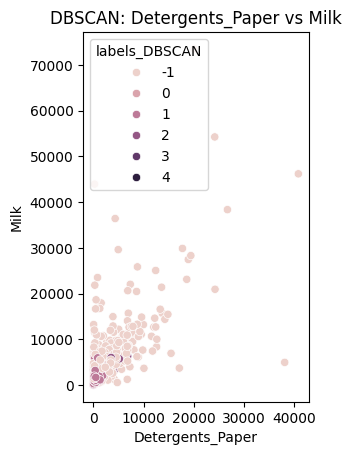

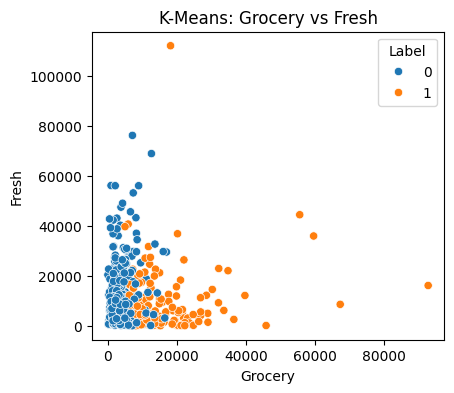

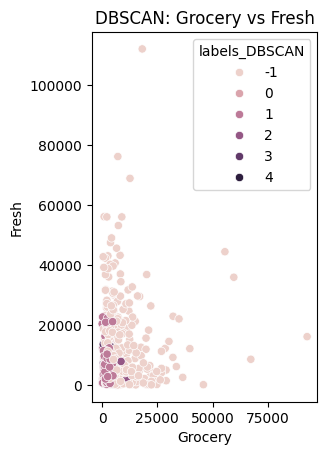

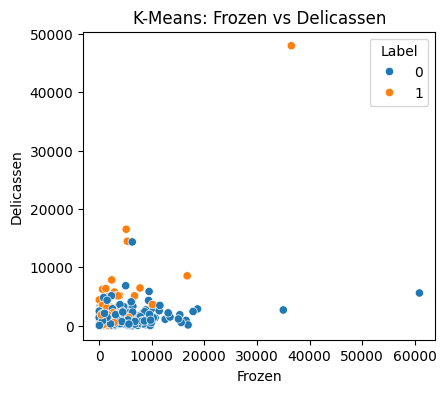

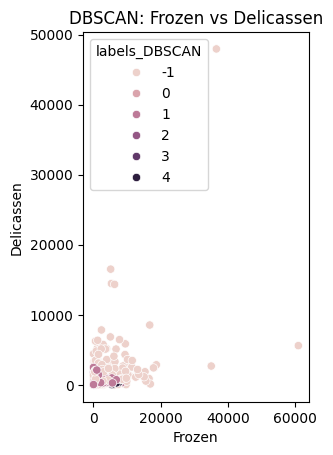

In [29]:
import matplotlib.pyplot as plt

# Define the pairs and respective titles
pairs_and_titles = [
    ('Detergents_Paper', 'Milk', 'Detergents_Paper vs Milk'),
    ('Grocery', 'Fresh', 'Grocery vs Fresh'),
    ('Frozen', 'Delicassen', 'Frozen vs Delicassen')
]

# Loop through each pair and generate plots
for x_col, y_col, title in pairs_and_titles:
    # Plot with K-Means labels
    plt.figure(figsize=(10, 4))  # Define the size of the figure
    plt.subplot(1, 2, 1)  # Prepare a subplot for K-Means
    plot(df[x_col], df[y_col], df['Label'], f'K-Means: {title}')

    # Plot with DBSCAN labels
    plt.subplot(1, 2, 2)  # Prepare a subplot for DBSCAN
    plot(df[x_col], df[y_col], df['labels_DBSCAN'], f'DBSCAN: {title}')


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [30]:
# Group by K-Means labels and compute the mean of all columns
means_by_kmeans = df.groupby('Label').mean()

# Print the computed means
print("Means by K-Means Labels:")
print(means_by_kmeans)


Means by K-Means Labels:
        Channel    Region         Fresh          Milk       Grocery  \
Label                                                                 
0      1.020067  2.498328  13046.220736   3092.096990   3746.806020   
1      1.964539  2.638298   9782.347518  11530.638298  16867.141844   

            Frozen  Detergents_Paper   Delicassen   Total_Spend  labels_DBSCAN  
Label                                                                           
0      3588.377926        775.083612  1172.695652  50849.598662       0.117057  
1      1976.773050       7348.276596  2271.680851  99562.921986      -0.815603  


In [31]:
# Group by DBSCAN labels and compute the mean of all columns
means_by_dbscan = df.groupby('labels_DBSCAN').mean()

# Print the computed means
print("Means by DBSCAN Labels:")
print(means_by_dbscan)


Means by DBSCAN Labels:
                Channel    Region         Fresh         Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.454545  2.451049  14180.041958  7773.297203  10675.541958   
 0             2.000000  3.000000  11401.000000  3536.200000   6729.000000   
 1             1.000000  3.000000   8118.158333  1854.283333   2404.358333   
 2             2.000000  3.000000   3068.142857  6095.857143  10355.000000   
 3             1.000000  1.000000   8190.000000  2041.875000   2279.250000   
 4             1.000000  1.000000   6823.000000  1943.000000   2372.666667   

                    Frozen  Detergents_Paper   Delicassen   Total_Spend  \
labels_DBSCAN                                                             
-1             3688.674825       4023.667832  1947.555944  84585.370629   
 0              720.200000       3561.000000   258.200000  52421.200000   
 1             1874.941667        493.258333   718.

Which algorithm appears to perform better?

**Your observations here**

-

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

def plot_kmeans_clusters(df, x_col, y_col, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df[[x_col, y_col]])
    df['Cluster'] = kmeans.labels_

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col], hue=df['Cluster'], palette=sns.color_palette("hsv", n_clusters))
    plt.title(f'Scatter Plot with {n_clusters} Clusters')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


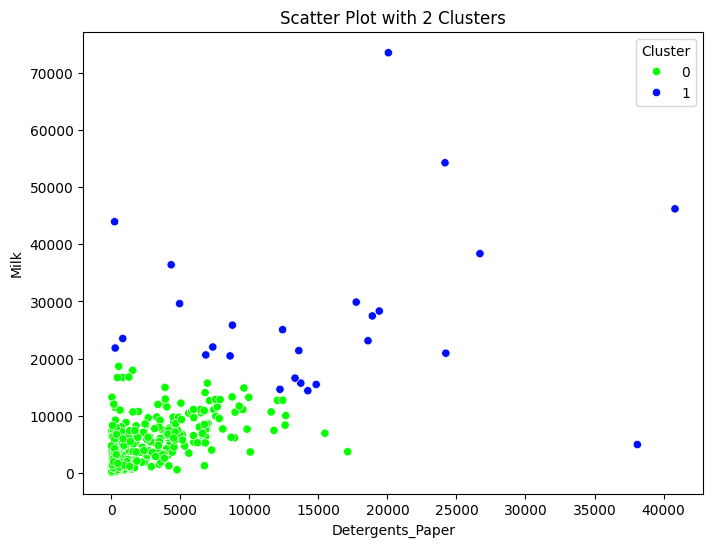

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


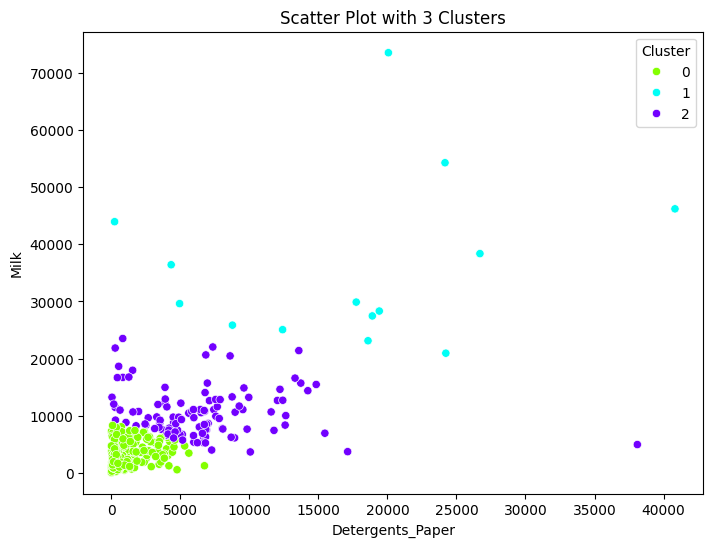

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


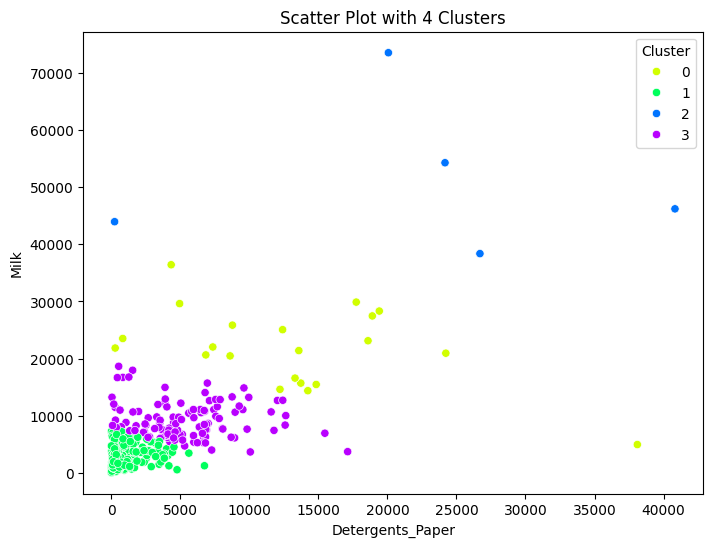

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


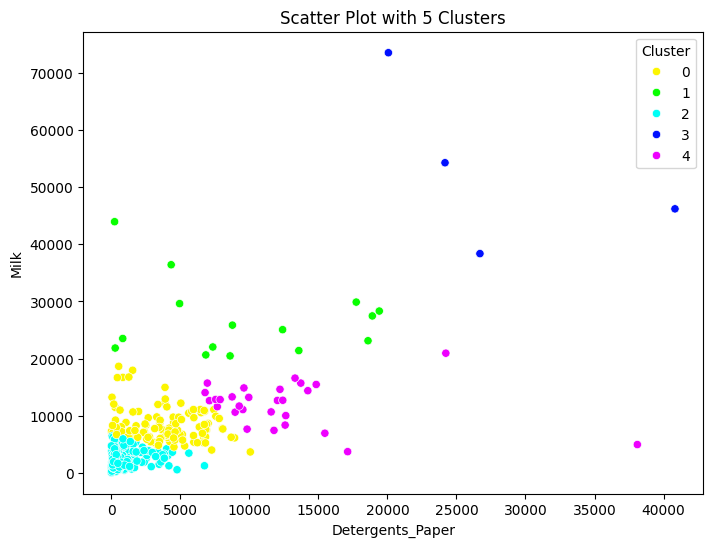

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


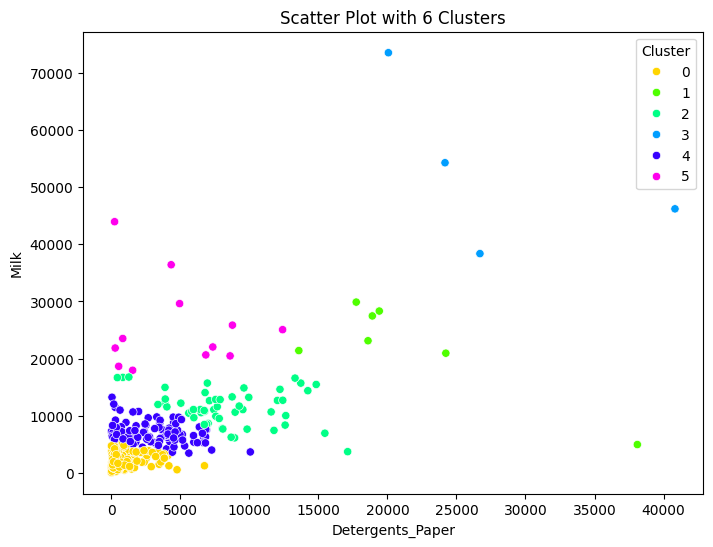

In [33]:
# Choose columns for visualization
x_col = 'Detergents_Paper'
y_col = 'Milk'

# Range of clusters to try
cluster_counts = [2, 3, 4, 5, 6]

# Loop through specified number of clusters
for n in cluster_counts:
    plot_kmeans_clusters(df, x_col, y_col, n)



**Your comment here**

- It seems that 4 clusters are by far the best point.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

def plot_dbscan(df, x_col, y_col, eps, min_samples):
    # Apply DBSCAN to the data
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(df[[x_col, y_col]])

    # Store the cluster labels
    df['DBSCAN_Cluster'] = dbscan.labels_

    # Plot the results
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col], hue=df['DBSCAN_Cluster'], palette='viridis', style=df['DBSCAN_Cluster'])
    plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}')
    plt.legend(title='Cluster')
    plt.show()


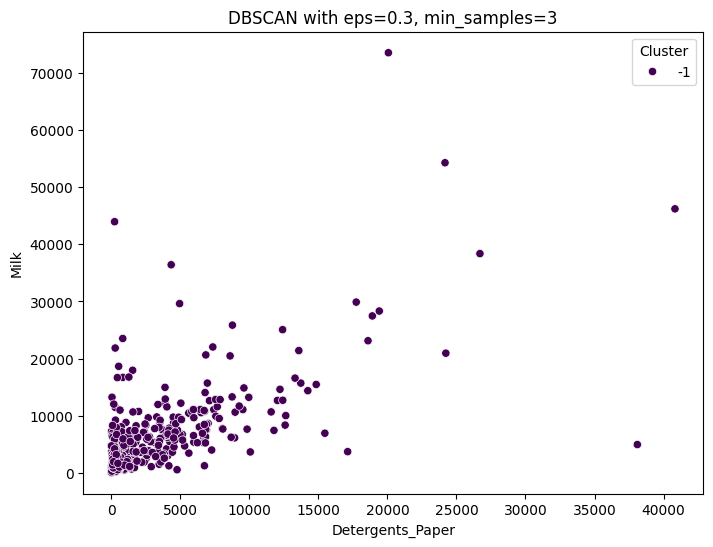

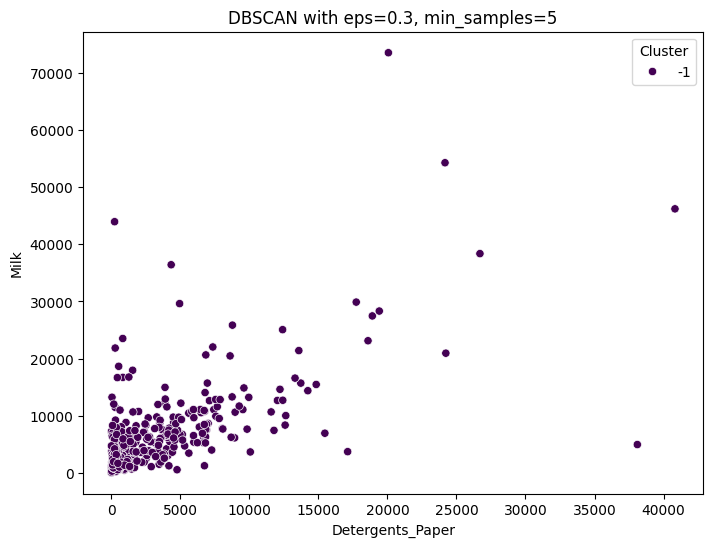

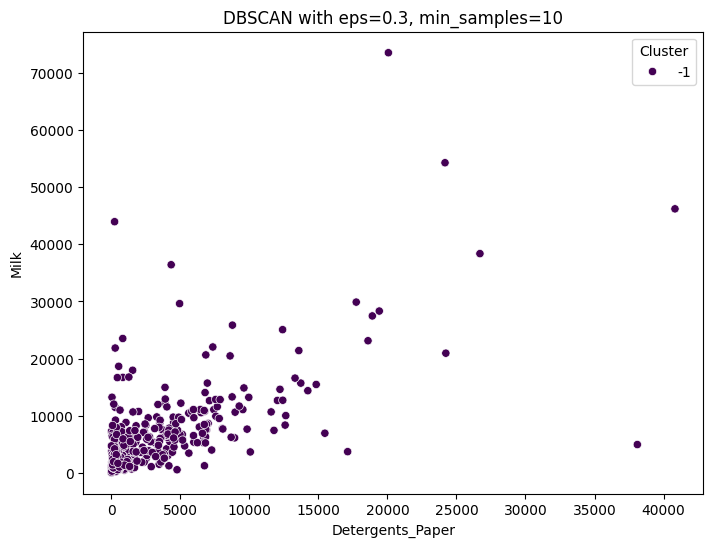

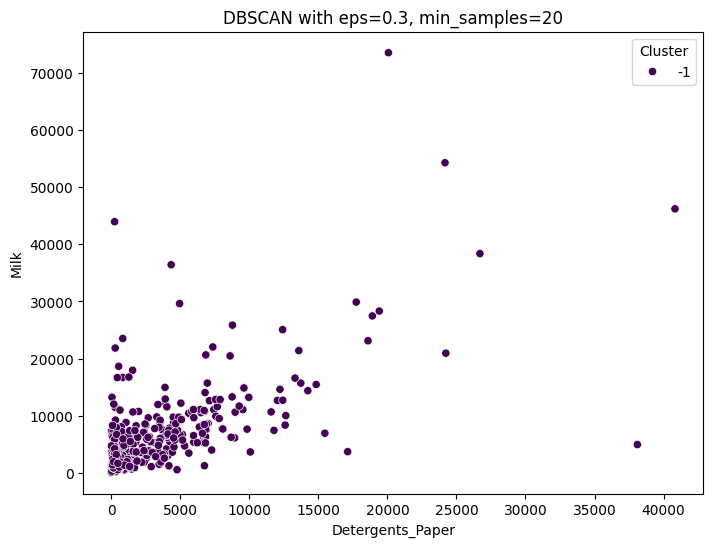

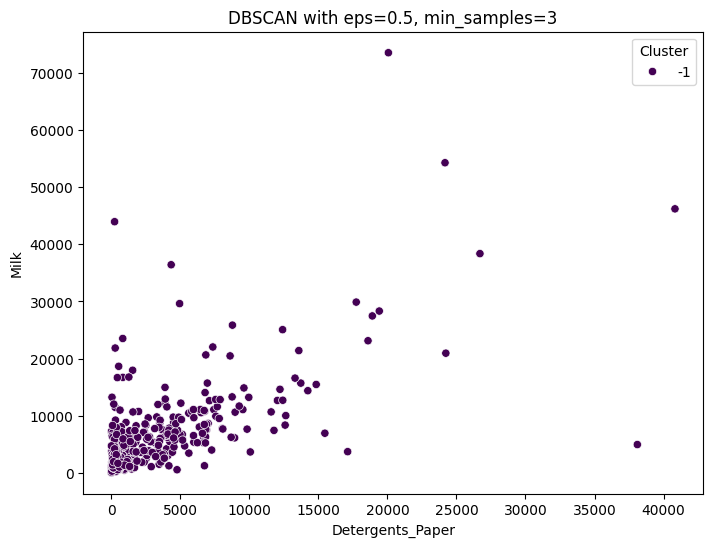

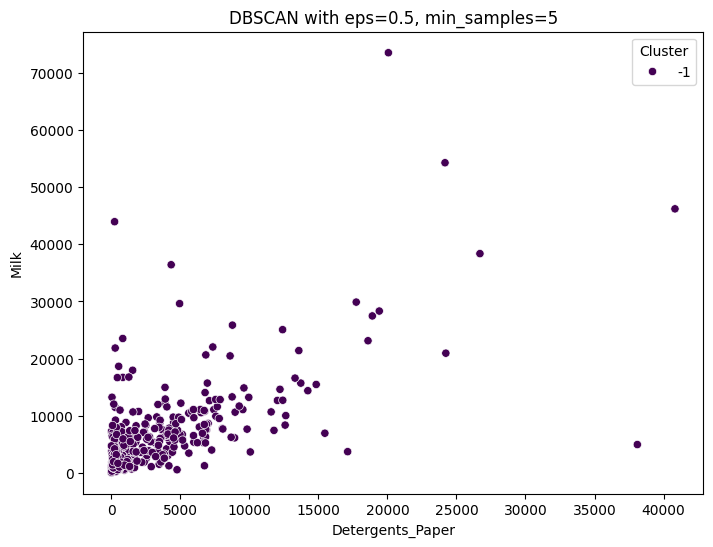

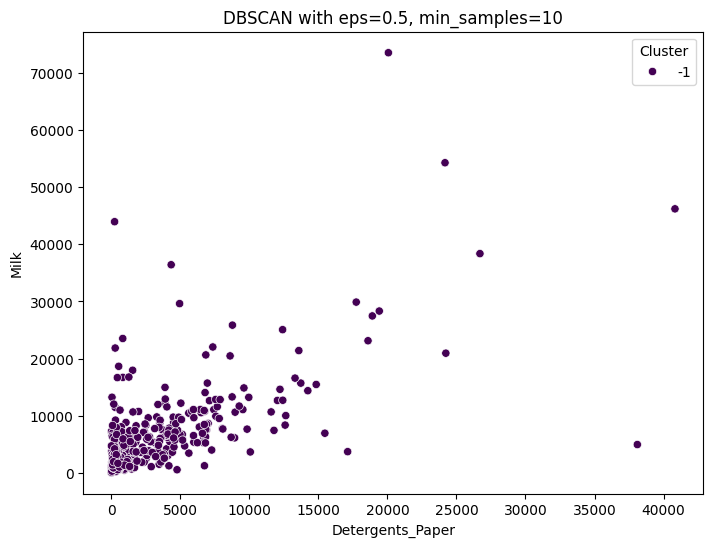

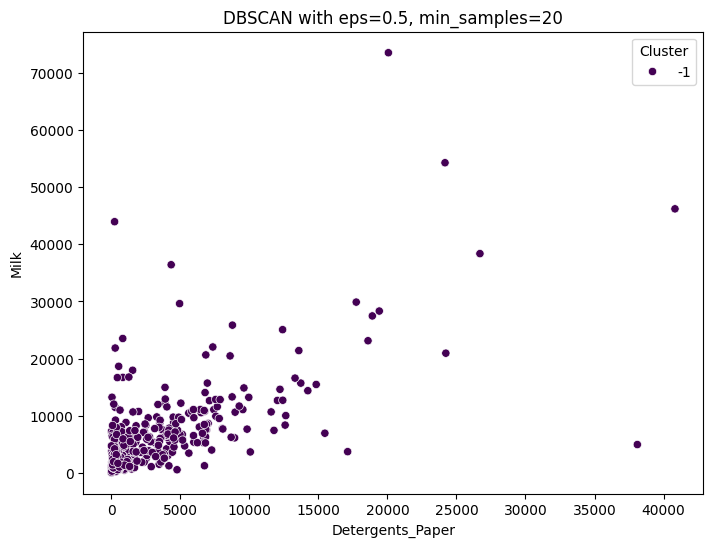

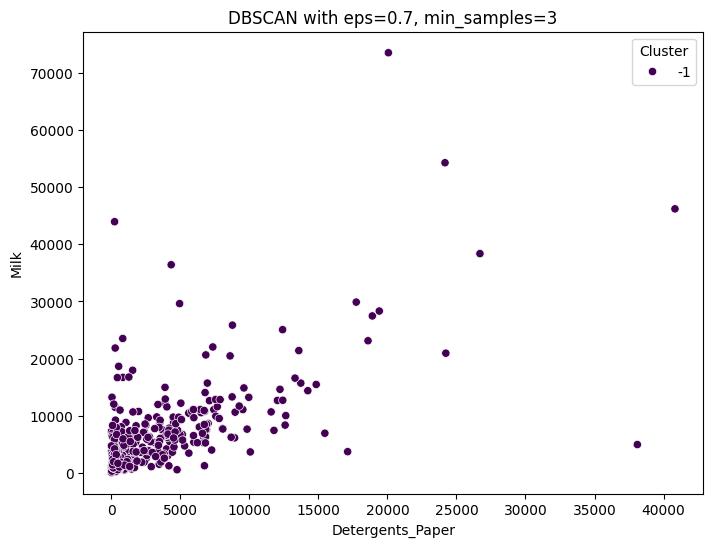

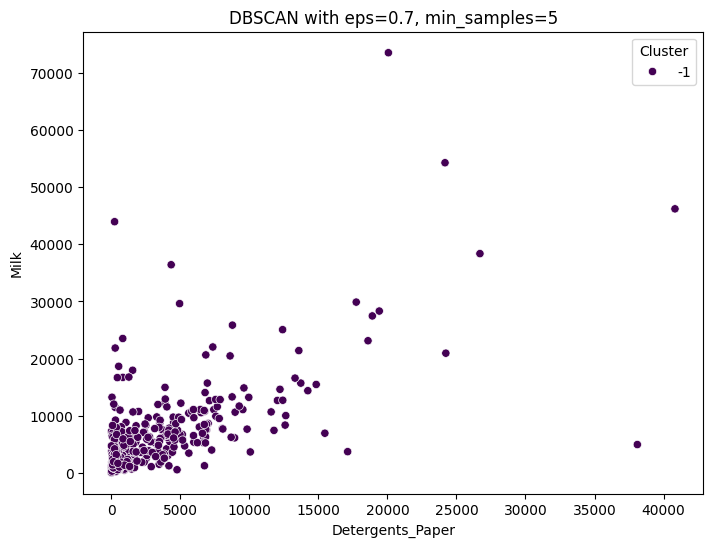

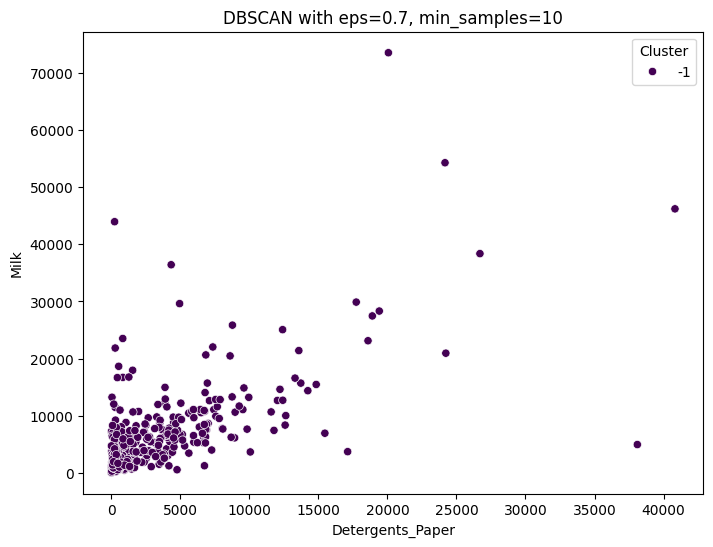

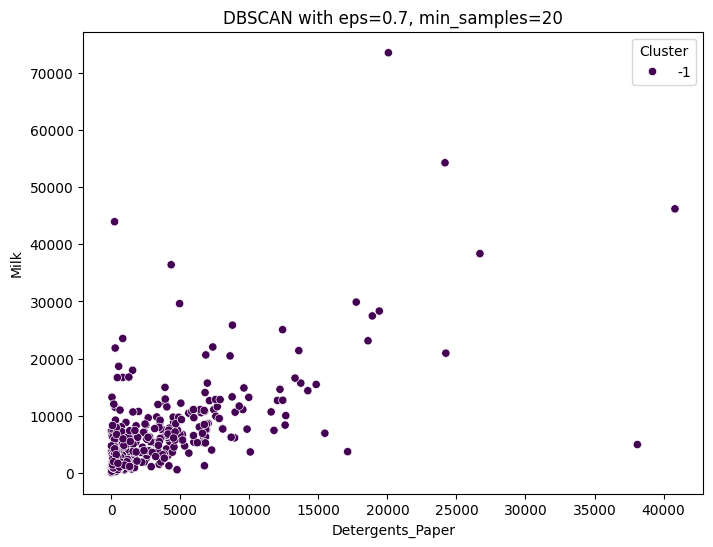

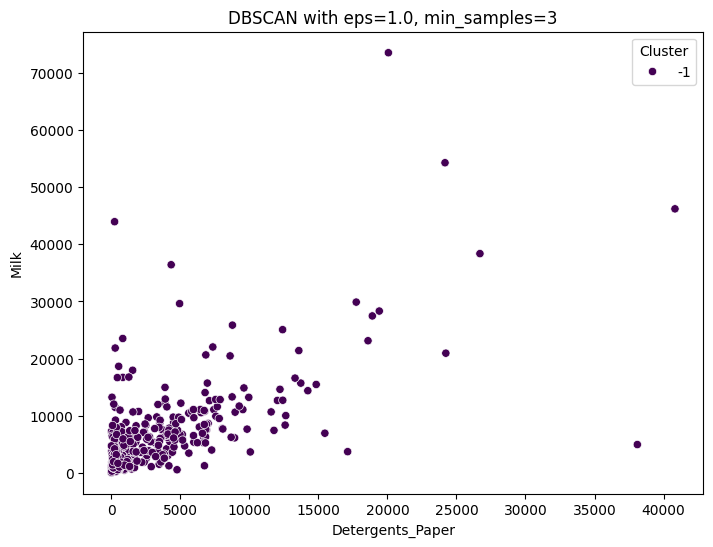

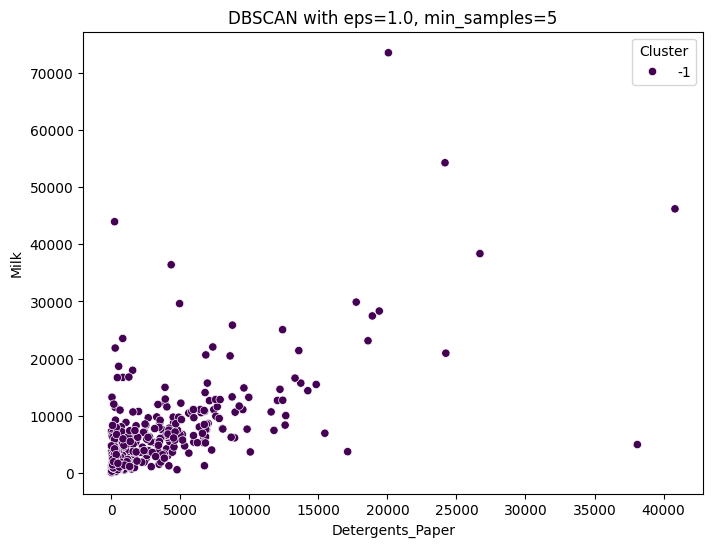

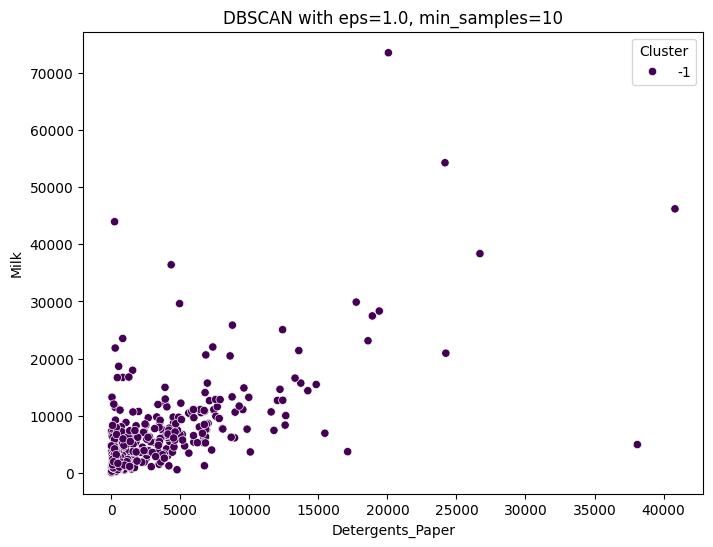

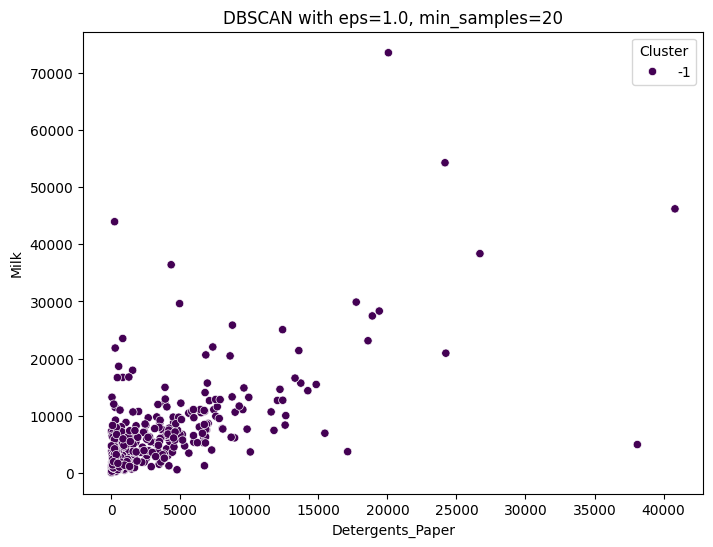

In [36]:
# Choose columns for visualization
x_col = 'Detergents_Paper'
y_col = 'Milk'

# Define parameter ranges to experiment with
eps_values = [0.3, 0.5, 0.7, 1.0]  # Adjust based on your data scale
min_samples_values = [3, 5, 10, 20]    # Common choices for density thresholds

# Loop through combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        plot_dbscan(df, x_col, y_col, eps, min_samples)


**Your comment here**

-